<a href="https://colab.research.google.com/github/Jainharshit09/Chronic-Kidney-Disease-ML/blob/main/Chronic_Kidney_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predecting Chronic Kidney Disease based on health Records
Dataset:https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease

DATA SET COLUMNS

Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps, Bacteria, Blood Glucose Random,Blood Urea,Serum Creatinine,Sodium,
Potassium,Hemoglobin, Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension, Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia, Class

In [ ]:
!pip install lux

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.0/127.0 kB 2.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.3 MB/s eta 0:00:00
  Created wheel for lux: filename=lux-0.5.1-py3-none-any.whl size=11964 sha256=32175f4fd039f850f0199ded999c229abb9b1454b3aec2ece571ec2a70d13107
  Stored in directory: /root/.cache/pip/wheels/e8/23/56/ad9393d57959f25ca5a7d6e55cb280cd1f9affbc987e2fbd26
  Created wheel for lux-api: filename=lux_api-0.5.1-py3-none-any.whl size=185603 sha256=3885494393de3dfcd9cbf710f264e19706cfcfae79c6637c324b25a8b2437a11
  Stored in directory: /root/.cache/pip/wheels/29/2f/f5/d5f

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lux

In [ ]:
data= pd.read_csv(r'/content/ckd_full.csv')
data.head()

/usr/local/lib/python3.10/dist-packages/lux/executor/PandasExecutor.py:548: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
/usr/local/lib/python3.10/dist-packages/IPython/core/formatters.py:918: UserWarning:
Unexpected error in rendering Lux widget and recommendations. Falling back to Pandas display.
Please report the following issue on Github: https://github.com/lux-org/lux/issues 

/usr/local/lib/python3.10/dist-packages/lux/core/frame.py:632: UserWarning:Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/lux/core/frame.py", line 581, in _ipython_display_
    self.maintain_metadata()
  File "/usr/local/lib/python3.10/dist-packages/lux/core/frame.py", line 146, in maintain_metadata
    self.compute_metadata()
  File "/usr/local/lib/python3.10/dist-packages/lux/core/frame.py", line 126, in compute_metadata
    lux.config

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [ ]:
data.shape

(400, 25)

In [ ]:
data.columns

Index(['Age', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar',
       'Red Blood Cells', 'Pus Cell', 'Pus Cell clumps', 'Bacteria',
       'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed Cell Volume',
       'White Blood Cell Count', 'Red Blood Cell Count', 'Hypertension',
       'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite',
       'Pedal Edema', 'Anemia', 'Class'],
      dtype='object')

In [ ]:
s=data['Class'].value_counts()
s

/usr/local/lib/python3.10/dist-packages/lux/executor/PandasExecutor.py:567: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [ ]:
data.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      391 non-null    float64
 1   Blood Pressure           388 non-null    float64
 2   Specific Gravity         353 non-null    float64
 3   Albumin                  354 non-null    float64
 4   Sugar                    351 non-null    float64
 5   Red Blood Cells          248 non-null    object 
 6   Pus Cell                 335 non-null    object 
 7   Pus Cell clumps          396 non-null    object 
 8   Bacteria                 396 non-null    object 
 9   Blood Glucose Random     356 non-null    float64
 10  Blood Urea               381 non-null    float64
 11  Serum Creatinine         383 non-null    float64
 12  Sodium                   313 non-null    float64
 13  Potassium                312 non-null    float64
 14  Hemoglobin               3

In [ ]:
data.isnull().sum()

/usr/local/lib/python3.10/dist-packages/lux/executor/PandasExecutor.py:567: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

- for numerical data use mean and median for catagorical we use mode

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
mode=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_impute=pd.DataFrame(mode.fit_transform(data))
df_impute.columns=data.columns
df_impute

/usr/local/lib/python3.10/dist-packages/lux/executor/PandasExecutor.py:548: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
/usr/local/lib/python3.10/dist-packages/lux/executor/PandasExecutor.py:548: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
/usr/local/lib/python3.10/dist-packages/lux/executor/PandasExecutor.py:548: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
/usr/local/lib/python3.10/dist-packages/lux/executor/PandasExecutor.py:548: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [ ]:
df_impute.isnull().sum()

/usr/local/lib/python3.10/dist-packages/lux/executor/PandasExecutor.py:567: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [ ]:
# find Unique value
for i in df_impute.columns:
  print("*******************",i,"*************")
  print()
  print(set(df_impute[i].tolist()))
  print()

******************* Age *************

{2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 11.0, 12.0, 14.0, 15.0, 17.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 90.0}

******************* Blood Pressure *************

{100.0, 70.0, 140.0, 110.0, 80.0, 50.0, 180.0, 120.0, 90.0, 60.0}

******************* Specific Gravity *************

{1.02, 1.025, 1.005, 1.015, 1.01}

******************* Albumin *************

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0}

******************* Sugar *************

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0}

******************* Red Blood Cells *************

{'abnormal', 'normal'}

******************* Pus Cell *************

{'abnormal', 'normal'}

***************

#**Check class Imbalance**

Axes(0.125,0.11;0.775x0.77)


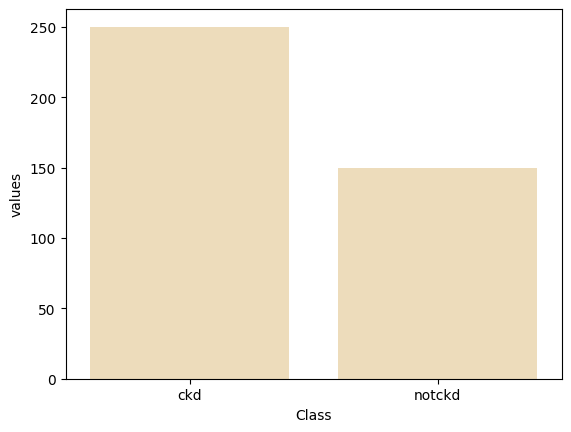

In [ ]:
temp=df_impute['Class'].value_counts()
temp_df=pd.DataFrame({'Class':temp.index,'values':temp.values})
print(sns.barplot(x='Class',y='values',data=temp_df,color='wheat'))

Fixing Data Types

In [ ]:
data.dtypes

Age                        float64
Blood Pressure             float64
Specific Gravity           float64
Albumin                    float64
Sugar                      float64
Red Blood Cells             object
Pus Cell                    object
Pus Cell clumps             object
Bacteria                    object
Blood Glucose Random       float64
Blood Urea                 float64
Serum Creatinine           float64
Sodium                     float64
Potassium                  float64
Hemoglobin                 float64
Packed Cell Volume         float64
White Blood Cell Count     float64
Red Blood Cell Count       float64
Hypertension                object
Diabetes Mellitus           object
Coronary Artery Disease     object
Appetite                    object
Pedal Edema                 object
Anemia                      object
Class                       object
dtype: object


In [ ]:
df_impute.dtypes

Age                        object
Blood Pressure             object
Specific Gravity           object
Albumin                    object
Sugar                      object
Red Blood Cells            object
Pus Cell                   object
Pus Cell clumps            object
Bacteria                   object
Blood Glucose Random       object
Blood Urea                 object
Serum Creatinine           object
Sodium                     object
Potassium                  object
Hemoglobin                 object
Packed Cell Volume         object
White Blood Cell Count     object
Red Blood Cell Count       object
Hypertension               object
Diabetes Mellitus          object
Coronary Artery Disease    object
Appetite                   object
Pedal Edema                object
Anemia                     object
Class                      object
dtype: object


In [ ]:
for i in data.select_dtypes(exclude=['object']).columns:
  df_impute[i]=df_impute[i].apply(lambda x:float(x))
df_impute.dtypes

Age                        float64
Blood Pressure             float64
Specific Gravity           float64
Albumin                    float64
Sugar                      float64
Red Blood Cells             object
Pus Cell                    object
Pus Cell clumps             object
Bacteria                    object
Blood Glucose Random       float64
Blood Urea                 float64
Serum Creatinine           float64
Sodium                     float64
Potassium                  float64
Hemoglobin                 float64
Packed Cell Volume         float64
White Blood Cell Count     float64
Red Blood Cell Count       float64
Hypertension                object
Diabetes Mellitus           object
Coronary Artery Disease     object
Appetite                    object
Pedal Edema                 object
Anemia                      object
Class                       object
dtype: object


# **Ploting**

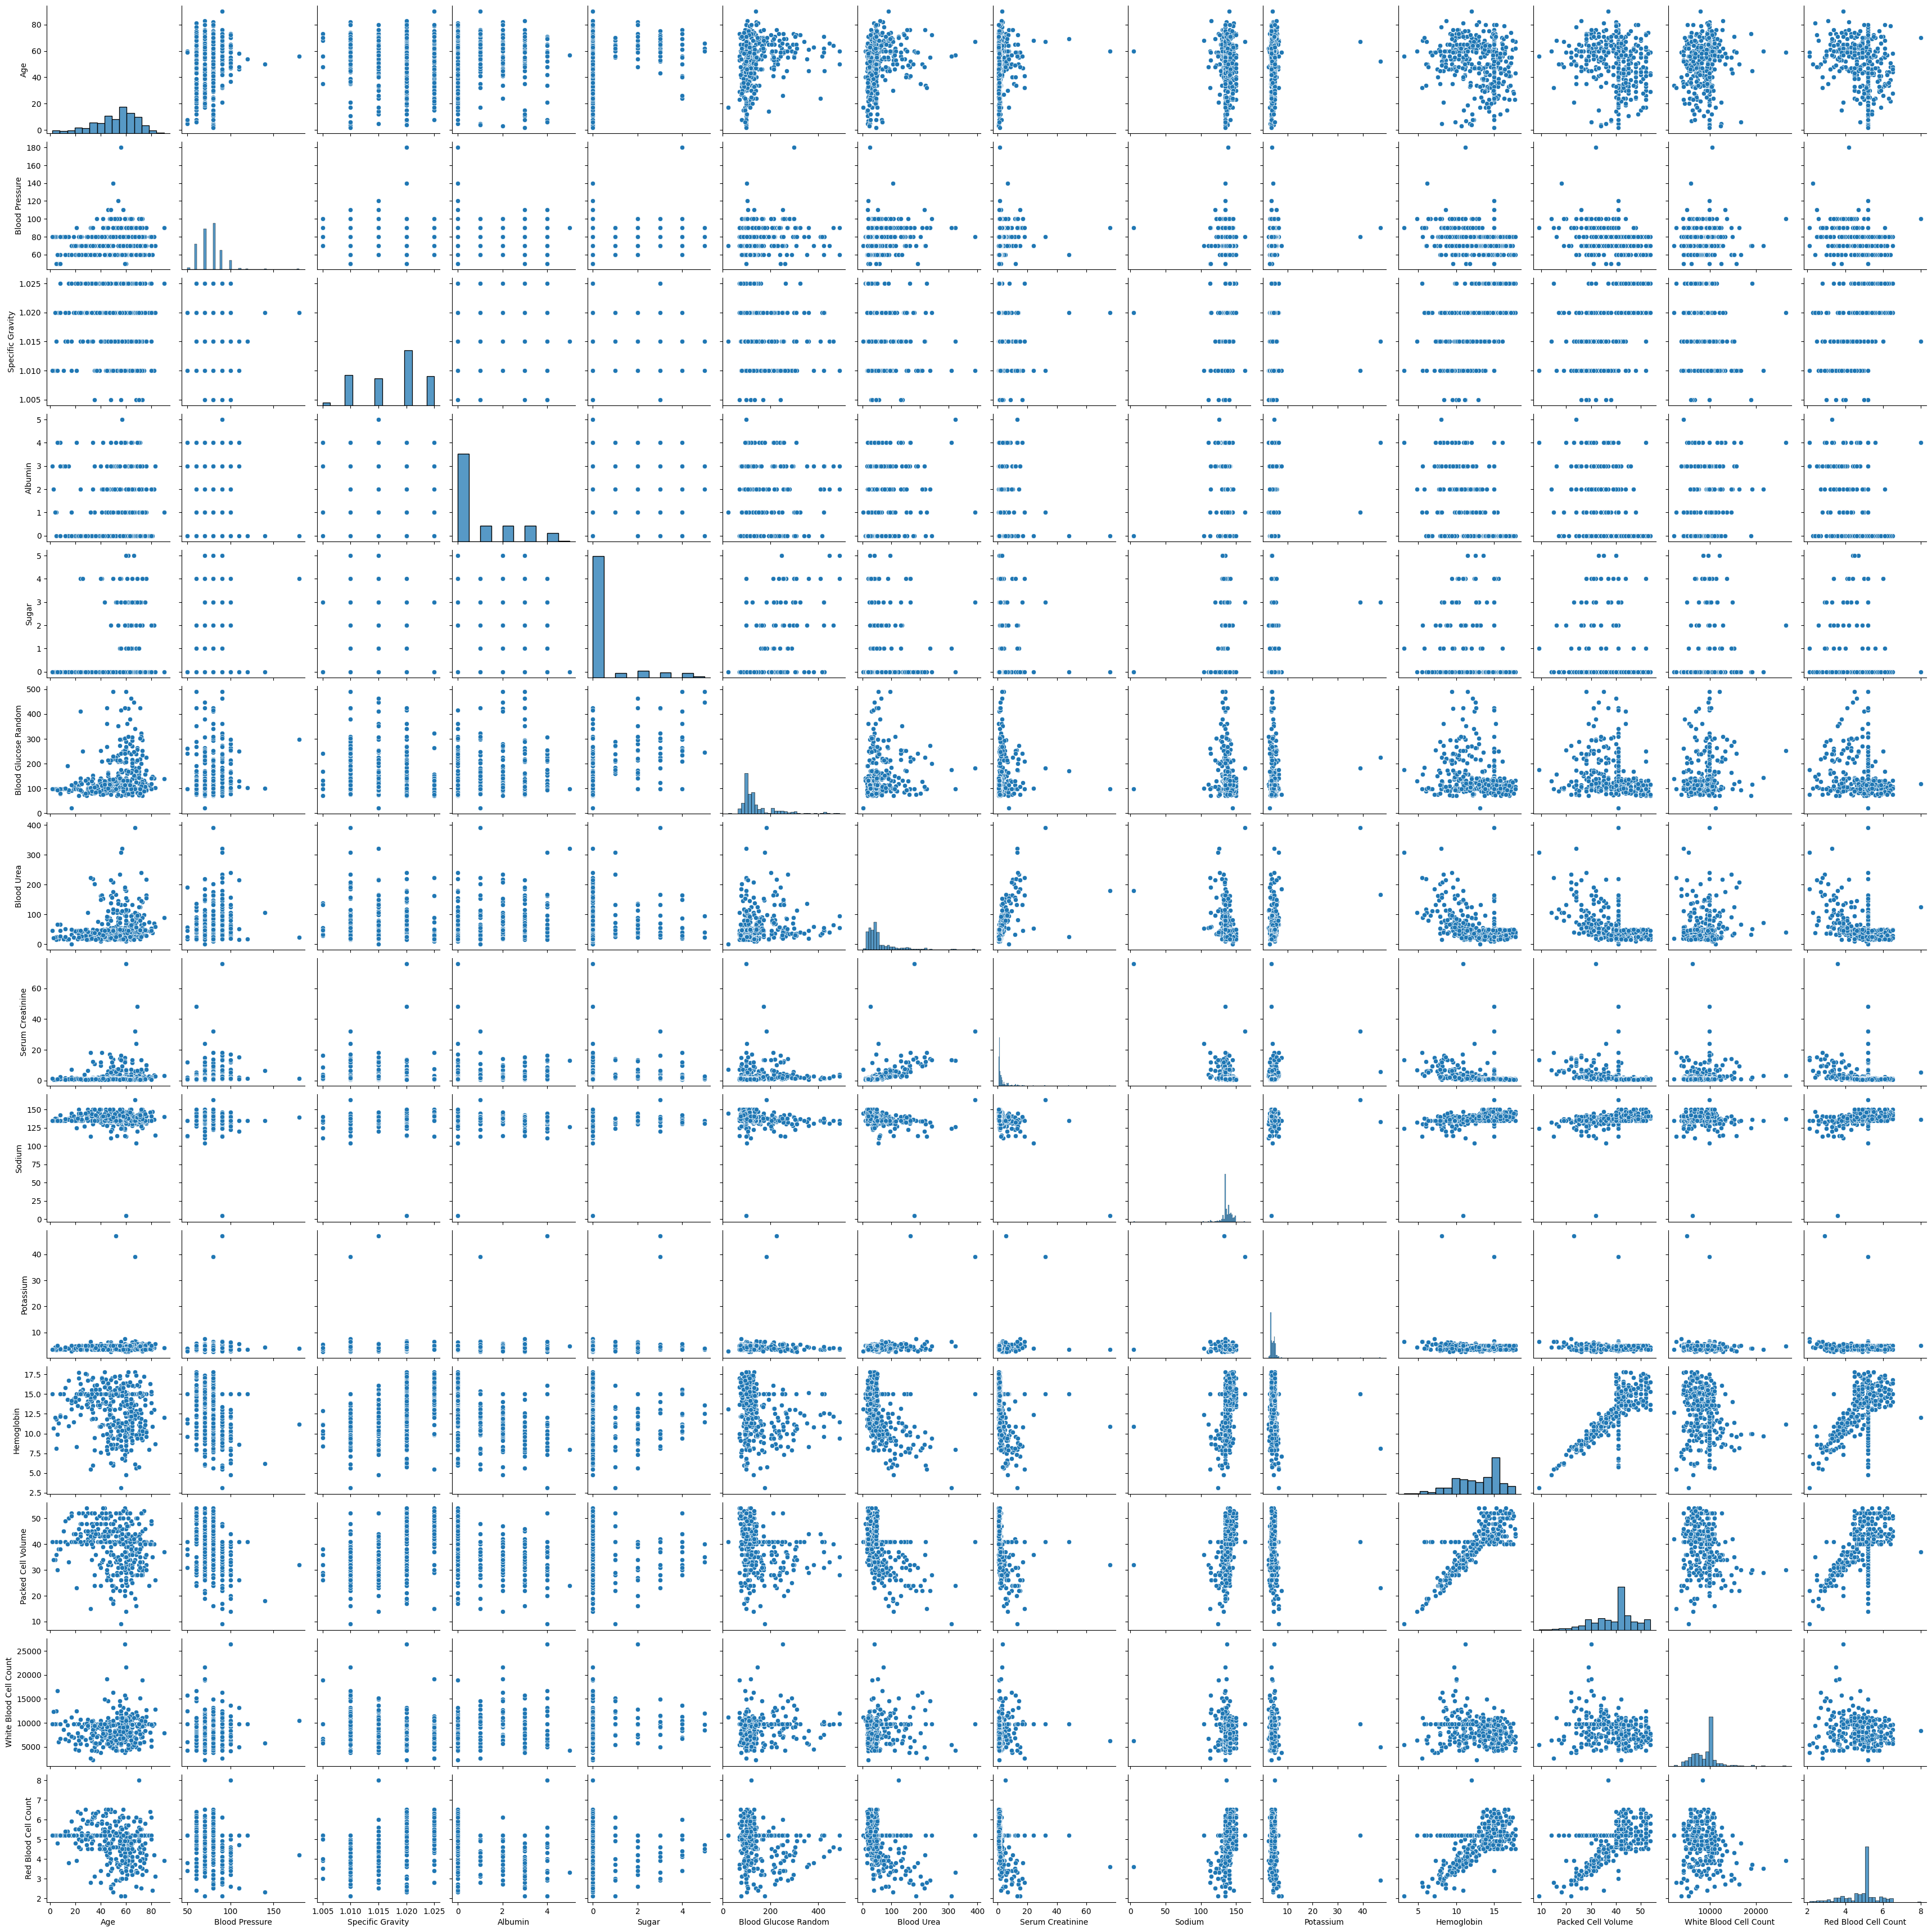

In [ ]:
sns.pairplot(df_impute)

<ipython-input-21-d864f2faaa67>:2: UserWarning:

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



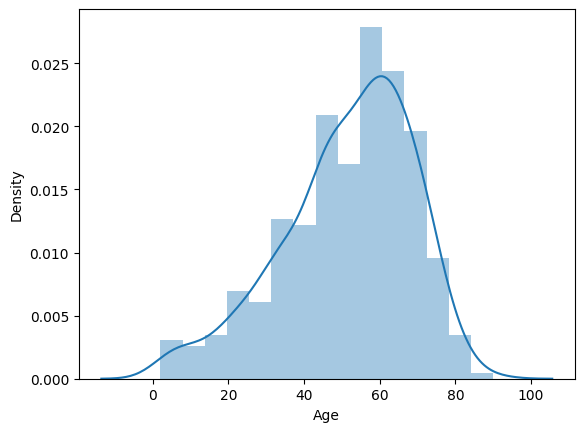

<ipython-input-21-d864f2faaa67>:2: UserWarning:

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



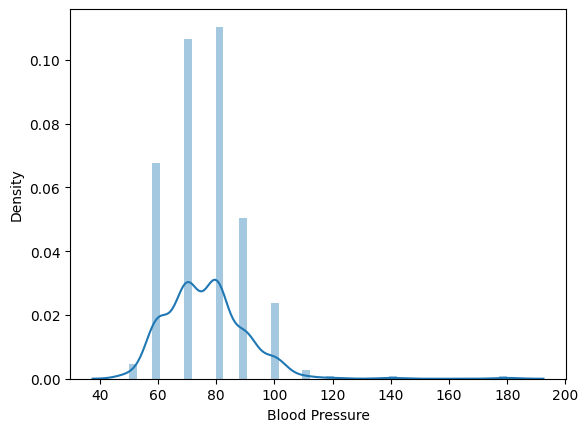

<ipython-input-21-d864f2faaa67>:2: UserWarning:

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



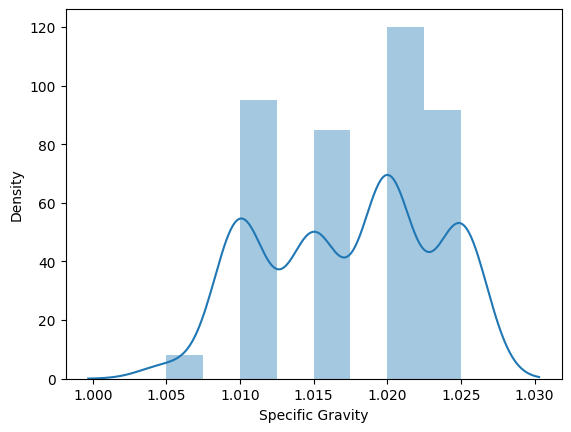

<ipython-input-21-d864f2faaa67>:2: UserWarning:

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



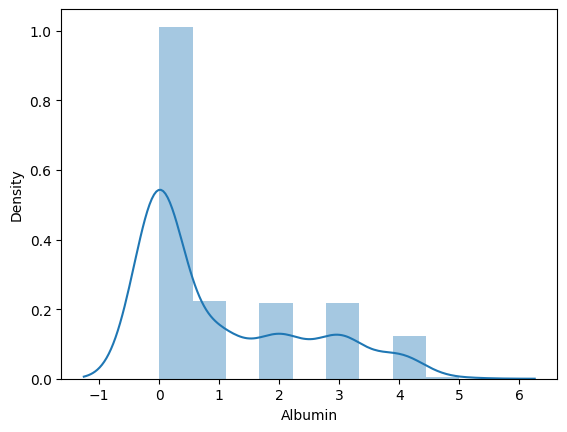

<ipython-input-21-d864f2faaa67>:2: UserWarning:

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



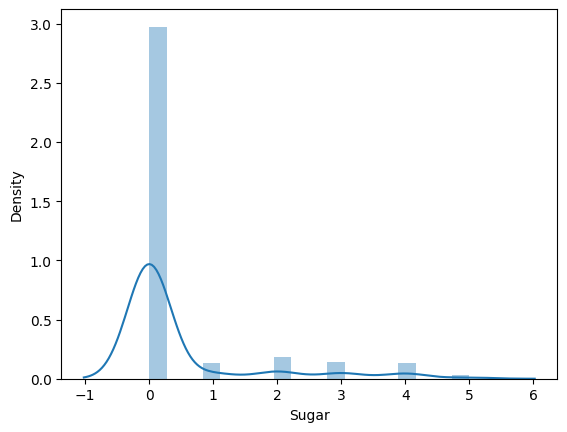

<ipython-input-21-d864f2faaa67>:2: UserWarning:

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



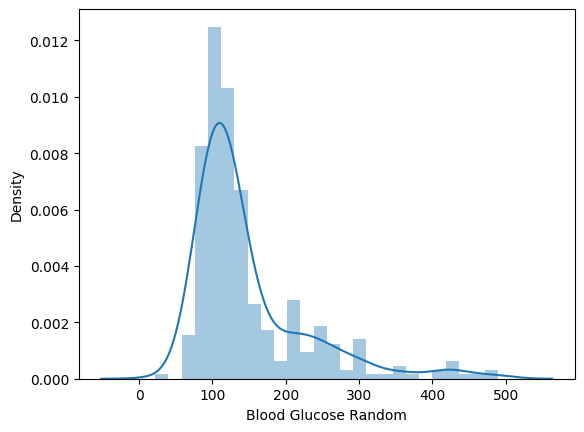

<ipython-input-21-d864f2faaa67>:2: UserWarning:

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



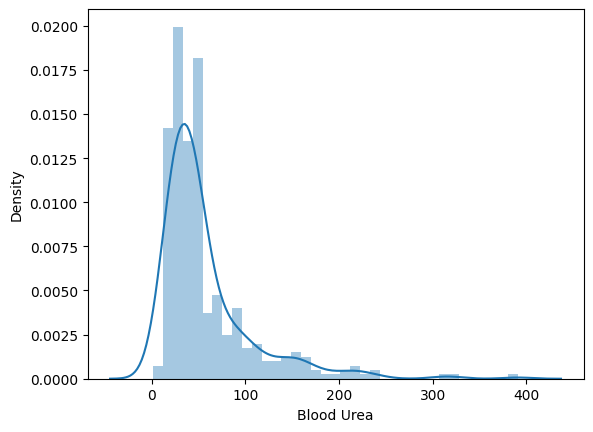

<ipython-input-21-d864f2faaa67>:2: UserWarning:

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



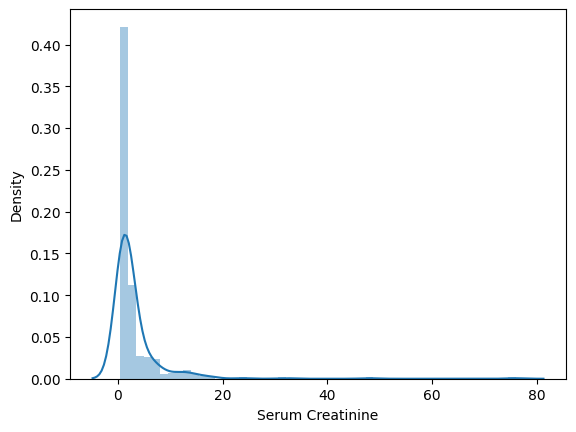

<ipython-input-21-d864f2faaa67>:2: UserWarning:

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



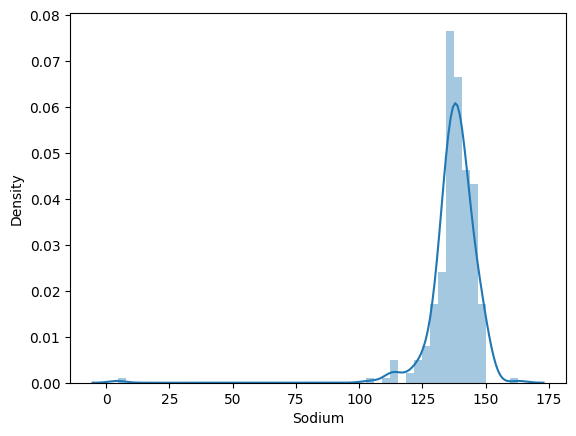

<ipython-input-21-d864f2faaa67>:2: UserWarning:

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



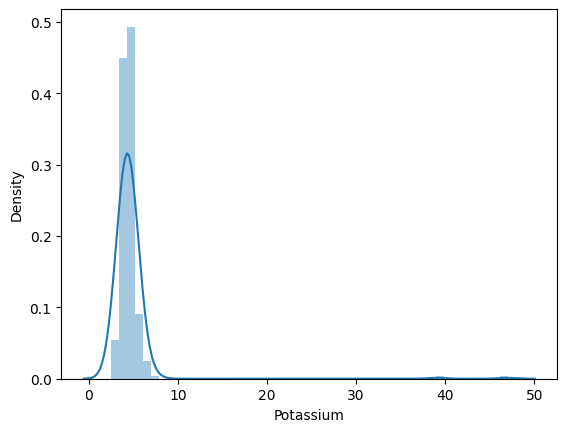

<ipython-input-21-d864f2faaa67>:2: UserWarning:

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



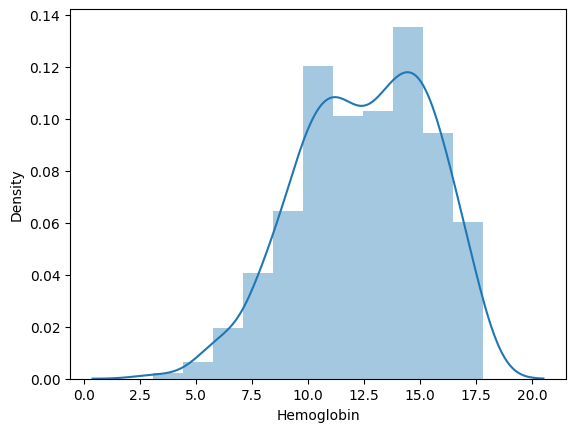

<ipython-input-21-d864f2faaa67>:2: UserWarning:

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



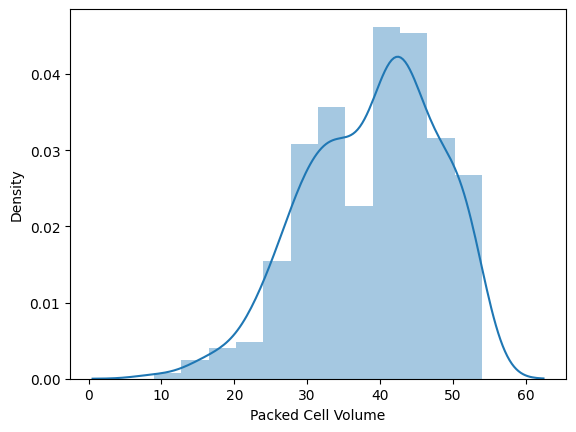

<ipython-input-21-d864f2faaa67>:2: UserWarning:

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



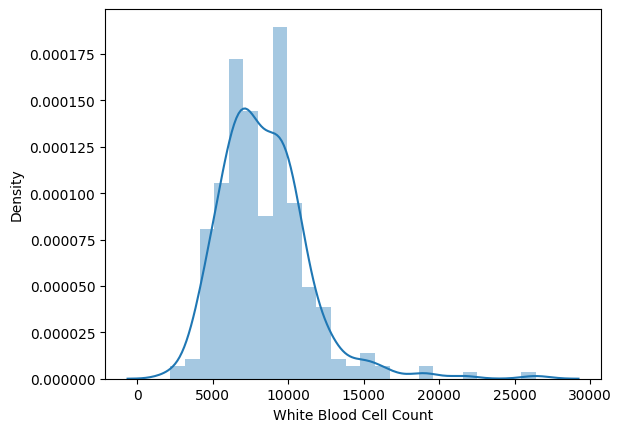

<ipython-input-21-d864f2faaa67>:2: UserWarning:

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



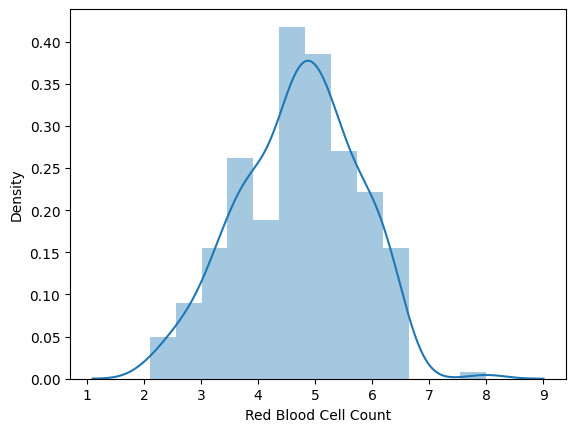

In [ ]:
def distplots(col):
  sns.distplot(data[col])
  plt.show();
for i in df_impute.select_dtypes(exclude=['object']).columns:
  distplots(i)

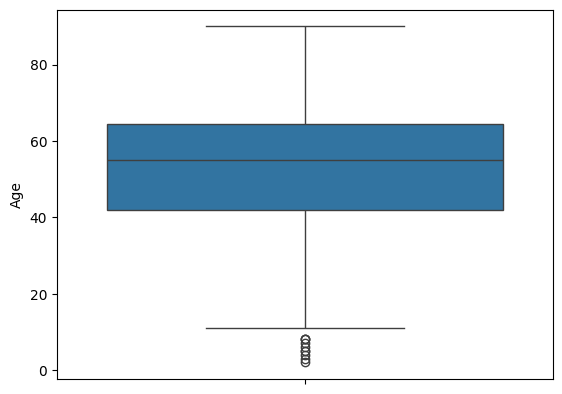

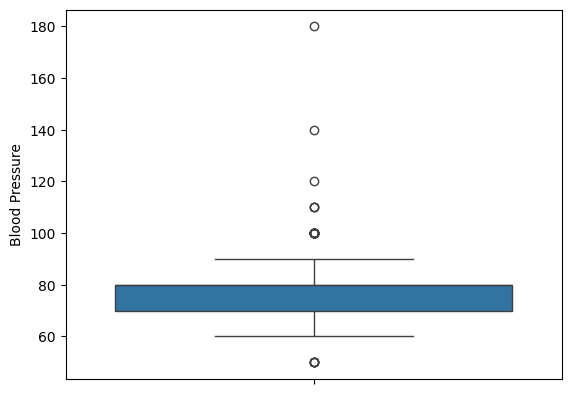

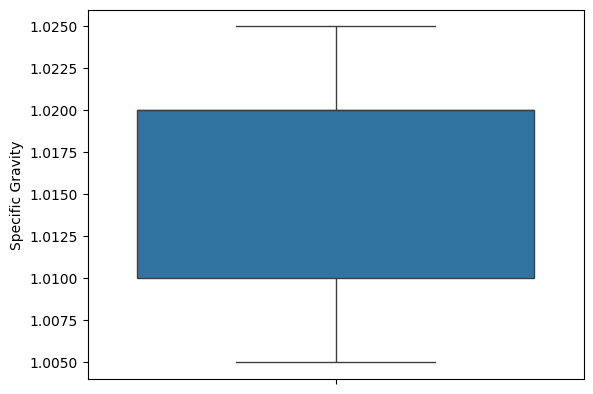

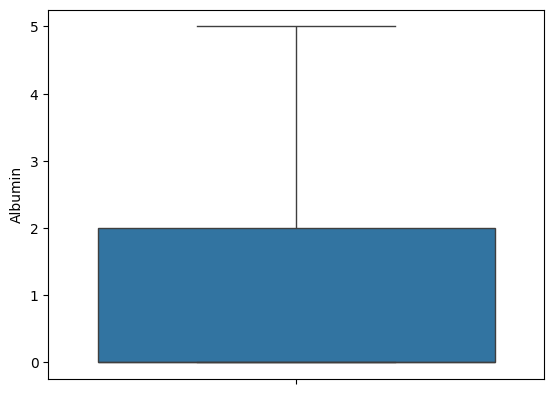

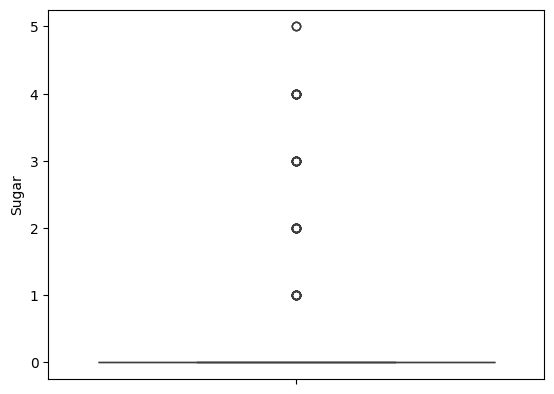

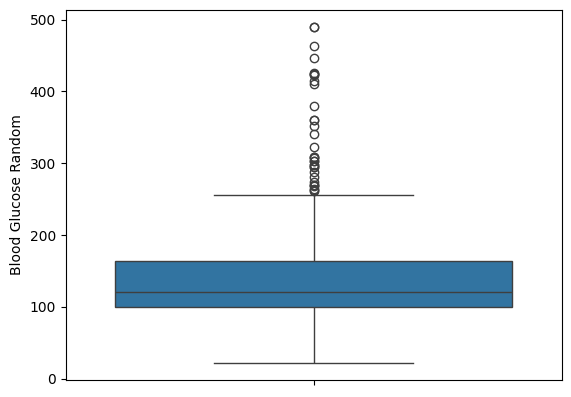

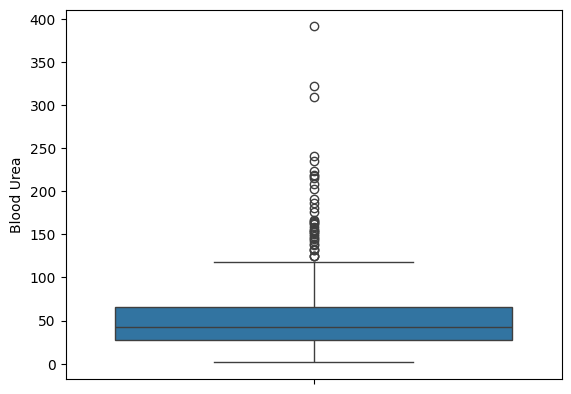

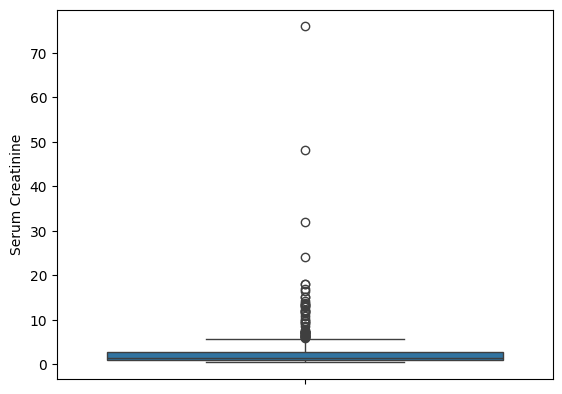

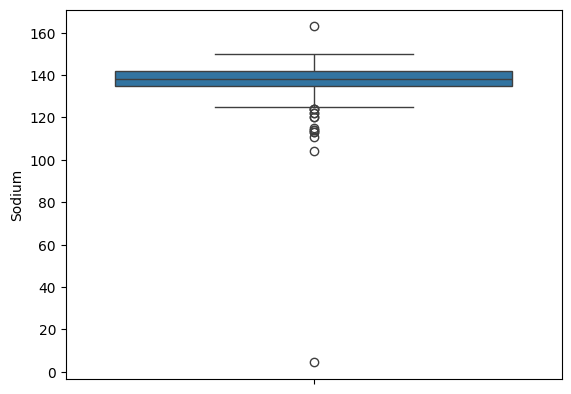

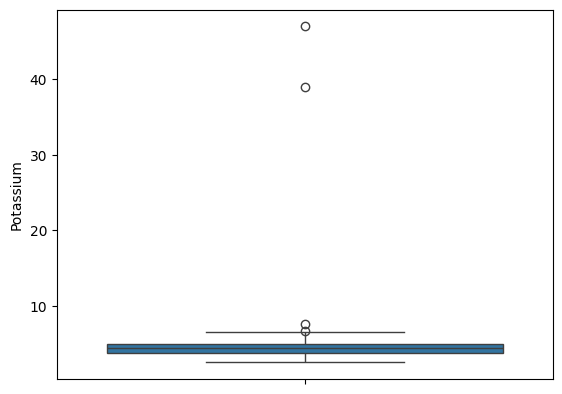

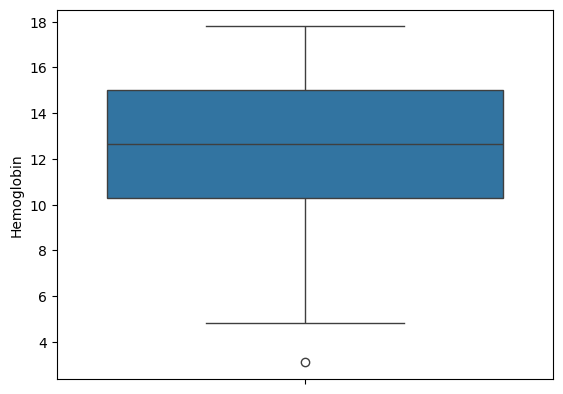

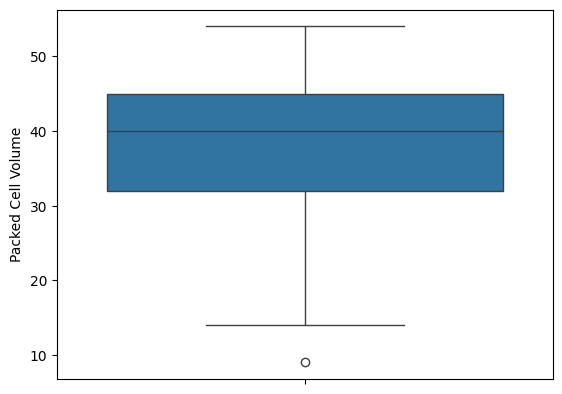

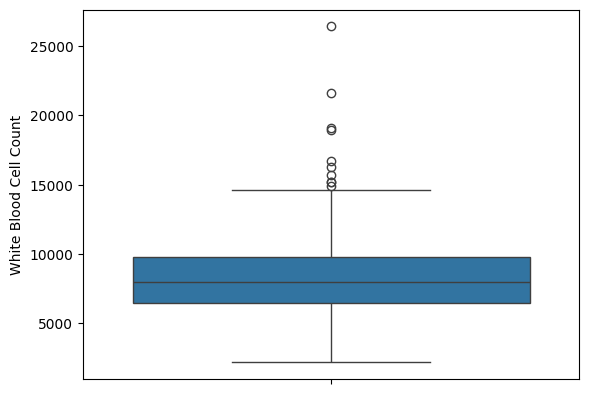

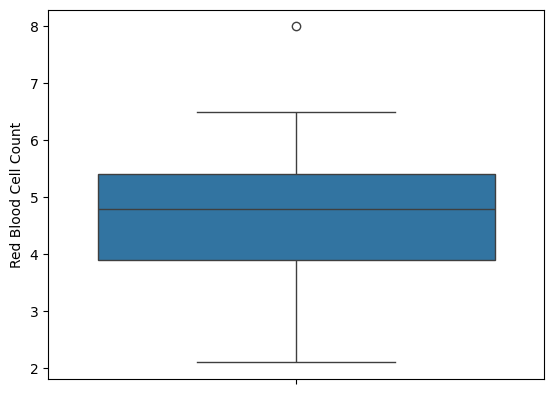

In [ ]:
def boxplots(col):
  sns.boxplot(data[col])
  plt.show();
for i in df_impute.select_dtypes(exclude=['object']).columns:
  boxplots(i)

**LABEL ENCODING**

In [ ]:
from sklearn import preprocessing
df_enco=df_impute.apply(preprocessing.LabelEncoder().fit_transform)
df_enco

/usr/local/lib/python3.10/dist-packages/lux/executor/PandasExecutor.py:567: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
/usr/local/lib/python3.10/dist-packages/lux/executor/PandasExecutor.py:567: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
/usr/local/lib/python3.10/dist-packages/lux/executor/PandasExecutor.py:567: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
/usr/local/lib/python3.10/dist-packages/lux/executor/PandasExecutor.py:567: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [ ]:
df_enco.to_csv("Kidney_Disease_Processed.csv")

# **Correlations**

<Axes: >

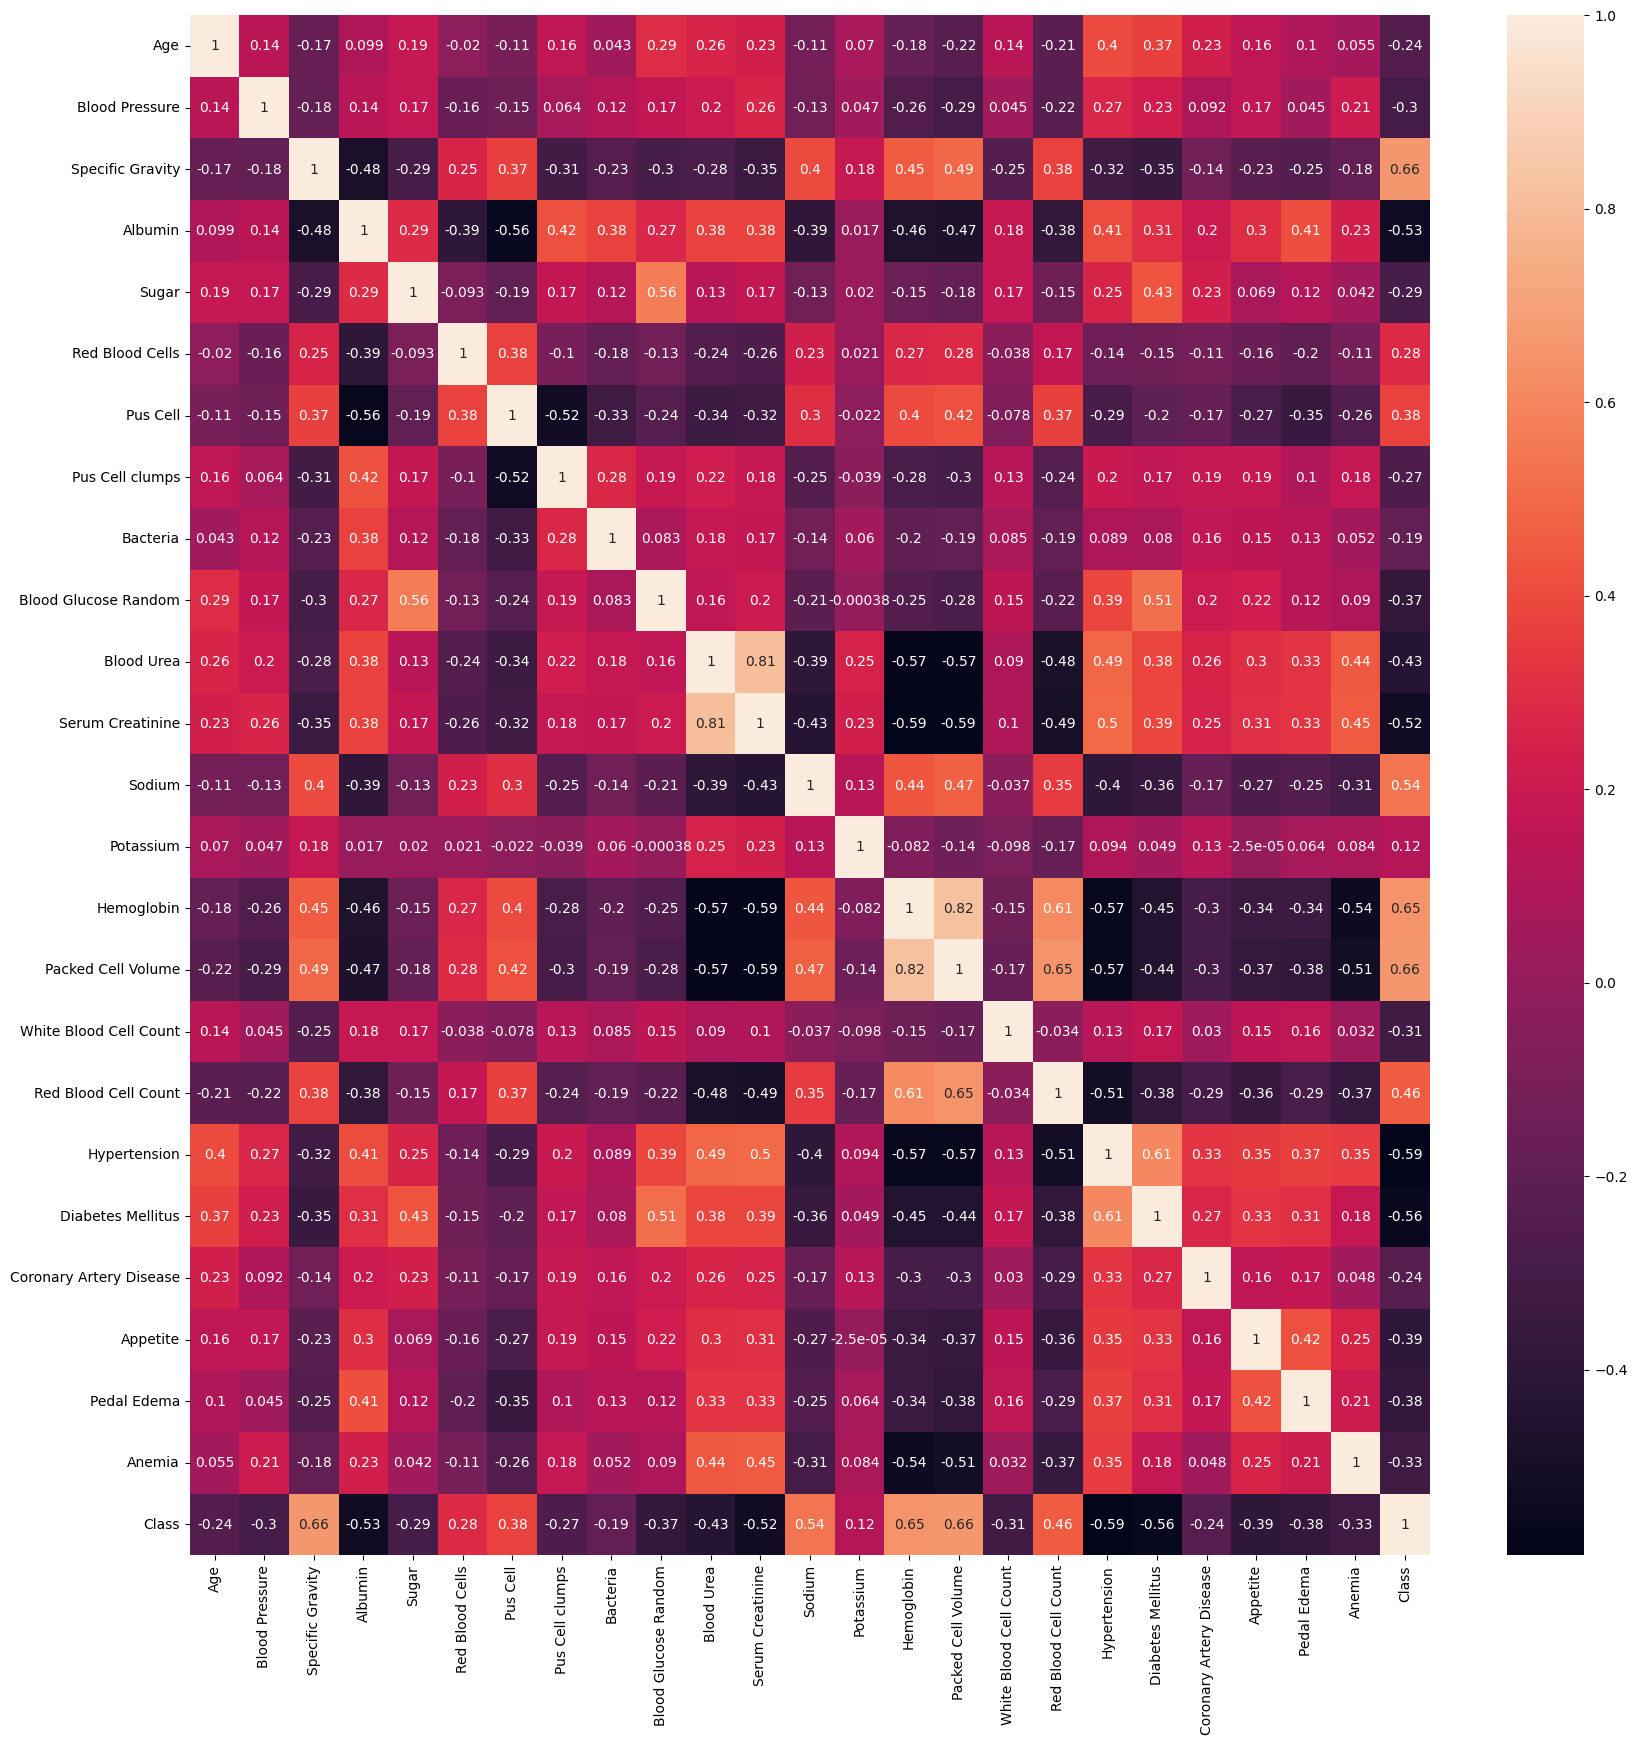

In [ ]:
plt.figure(figsize=(20,20))
corr=df_enco.corr(); # perrsion cor-relation method
sns.heatmap(corr,annot=True)

From the heat map we see there is no high correlation so we do'nt need to drop any column

# Seprate independent and dependent variable and drop id and column

In [ ]:
X=df_enco.drop(['Class'],axis=1)
y=df_enco['Class']

In [ ]:
!pip install imblearn

In [ ]:
#Detect label in balance
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
print(Counter(y))

Counter({0: 250, 1: 150})


In [ ]:
ros=RandomOverSampler()
X_ros,y_ros=ros.fit_resample(X,y)
print(Counter(y))

Counter({0: 250, 1: 150})


**Normalization**

*Initialize a min max scaler the feature b/w -1 to 1*

*the fit_transfrom() method  fits the data we don't need to scale the labels*
*scale the feature n/w -1 to 1*

***Scaling is important in the algorithms such as svm and knn where distance    b/w the data points are important***

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler((-1,1))
X=scaler.fit_transform(X_ros)
y=y_ros

In [ ]:
print(X)
print(y)

[[ 0.06666667 -0.33333333  0.5        ... -1.         -1.
  -1.        ]
 [-0.86666667 -1.          0.5        ... -1.         -1.
  -1.        ]
 [ 0.44       -0.33333333 -0.5        ...  1.         -1.
   1.        ]
 ...
 [ 0.73333333 -0.33333333  1.         ... -1.         -1.
  -1.        ]
 [ 0.06666667 -0.77777778  0.5        ... -1.         -1.
  -1.        ]
 [ 0.25333333 -0.33333333  0.5        ... -1.         -1.
  -1.        ]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

**Feature extraction using PCA**

In [ ]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(.95)
X_PCA=pca.fit_transform(X)
print(X.shape)
print(X_PCA.shape)

(500, 24)
(500, 18)


# **Traning and Testing Part**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_PCA,y,test_size=0.2,random_state=42)

In [ ]:
!pip install keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.models import Sequential,Model
from keras.optimizers import Adam
from sklearn.model_selection import KFold

In [ ]:
def model():
  classifier=Sequential()
  classifier.add(Dense(15,input_shape=(X_train.shape[1],),activation='relu'))
  classifier.add(Dropout(0.2))
  classifier.add(Dense(15,activation='relu'))
  classifier.add(Dropout(0.4))
  classifier.add(Dense(1,activation='sigmoid'))
  classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return classifier

In [ ]:
model=model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 15)                285       
                                                                 
 dropout_2 (Dropout)         (None, 15)                0         
                                                                 
 dense_4 (Dense)             (None, 15)                240       
                                                                 
 dropout_3 (Dropout)         (None, 15)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 16        
                                                                 
Total params: 541 (2.11 KB)
Trainable params: 541 (2.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
(X_train.shape[1]+1)*15

285

In [ ]:
y_train.shape

(400,)

In [ ]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=8,verbose=1)

Epoch 1/8
13/13 [==============================] - 0s 12ms/step - loss: 0.4565 - accuracy: 0.8700 - val_loss: 0.3987 - val_accuracy: 0.8800
Epoch 2/8
13/13 [==============================] - 0s 6ms/step - loss: 0.4253 - accuracy: 0.8475 - val_loss: 0.3678 - val_accuracy: 0.9000
Epoch 3/8
13/13 [==============================] - 0s 7ms/step - loss: 0.3860 - accuracy: 0.8850 - val_loss: 0.3379 - val_accuracy: 0.9000
Epoch 4/8
13/13 [==============================] - 0s 7ms/step - loss: 0.3644 - accuracy: 0.8650 - val_loss: 0.3099 - val_accuracy: 0.9100
Epoch 5/8
13/13 [==============================] - 0s 7ms/step - loss: 0.3210 - accuracy: 0.9125 - val_loss: 0.2833 - val_accuracy: 0.9300
Epoch 6/8
13/13 [==============================] - 0s 7ms/step - loss: 0.3190 - accuracy: 0.8975 - val_loss: 0.2587 - val_accuracy: 0.9400
Epoch 7/8
13/13 [==============================] - 0s 7ms/step - loss: 0.3012 - accuracy: 0.9300 - val_loss: 0.2369 - val_accuracy: 0.9400
Epoch 8/8
13/13 [=========

**Solving Overfitting Problem because at the time of testing we having a high variance**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from sklearn.metrics import classification_report

In [ ]:
model=Sequential()
model.add(Dense(15,input_shape=(X_train.shape[1],),activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(15,activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=10, verbose=1, callbacks=[early_stopping])

Epoch 1/10
40/40 [==============================] - 2s 12ms/step - loss: 0.9091 - accuracy: 0.6675 - val_loss: 0.8394 - val_accuracy: 0.8300
Epoch 2/10
40/40 [==============================] - 0s 3ms/step - loss: 0.8037 - accuracy: 0.7900 - val_loss: 0.7245 - val_accuracy: 0.9200
Epoch 3/10
40/40 [==============================] - 0s 3ms/step - loss: 0.6880 - accuracy: 0.8725 - val_loss: 0.6099 - val_accuracy: 0.9200
Epoch 4/10
40/40 [==============================] - 0s 3ms/step - loss: 0.5870 - accuracy: 0.9025 - val_loss: 0.5099 - val_accuracy: 0.9400
Epoch 5/10
40/40 [==============================] - 0s 3ms/step - loss: 0.4978 - accuracy: 0.9300 - val_loss: 0.4270 - val_accuracy: 0.9500
Epoch 6/10
40/40 [==============================] - 0s 4ms/step - loss: 0.4419 - accuracy: 0.9550 - val_loss: 0.3653 - val_accuracy: 0.9500
Epoch 7/10
40/40 [==============================] - 0s 3ms/step - loss: 0.3788 - accuracy: 0.9725 - val_loss: 0.3233 - val_accuracy: 0.9500
Epoch 8/10
40/40 [=

In [ ]:
y_pred = model.predict(X_train)
y_pred_binary = (y_pred > 0.5).astype(int)
report=classification_report(y_train,y_pred_binary)
print(report)

13/13 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       204
           1       0.98      1.00      0.99       196

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



13/13 [==============================] - 0s 3ms/step


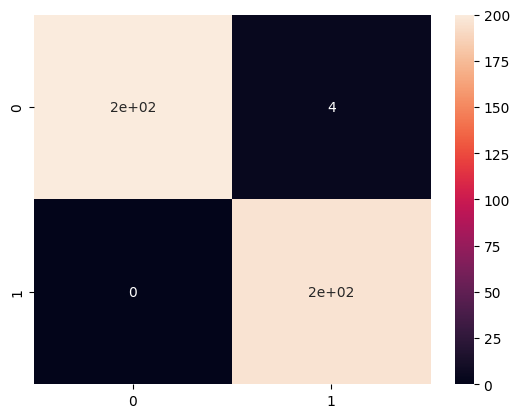

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = model.predict(X_train)
y_pred_binary = (y_pred > 0.5).astype(int)
matrix=confusion_matrix(y_train,y_pred_binary)
sns.heatmap(matrix,annot=True)
plt.show()


In [ ]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)
accuracy

4/4 [==============================] - 0s 6ms/step


0.96

In [ ]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
report=classification_report(y_test,y_pred_binary)
print(report)

4/4 [==============================] - 0s 15ms/step
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        46
           1       0.93      1.00      0.96        54

    accuracy                           0.96       100
   macro avg       0.97      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



4/4 [==============================] - 0s 6ms/step


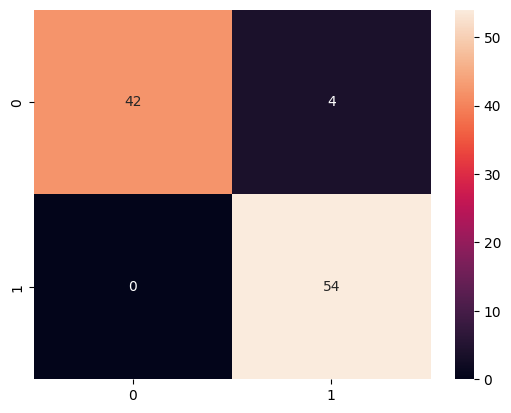

In [ ]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
matrix=confusion_matrix(y_test,y_pred_binary)
sns.heatmap(matrix,annot=True)
plt.show()

***After doing all thing overfitting and using sequential model we get a train accuracy 98% and in testing we get 96% accuracy also create a classification report that help to  analyze better in medical field.we don't depend on accuracy rather than on f1 score or recall.***

---



# **RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 10)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
matrix=confusion_matrix(y_train, model.predict(X_train))

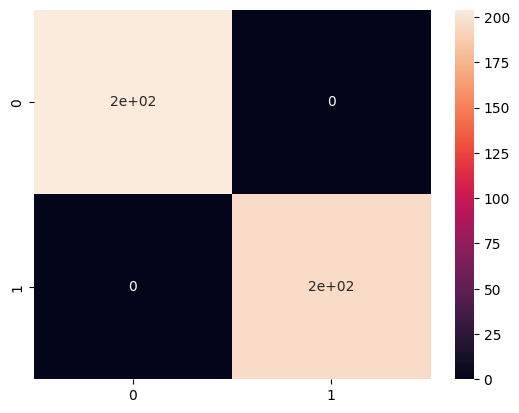

In [ ]:
sns.heatmap(matrix,annot=True)
plt.show()

In [ ]:
accuracy = accuracy_score(y_train, model.predict(X_train))
accuracy

1.0

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
matrix=confusion_matrix(y_test, model.predict(X_test))

In [ ]:
accuracy = accuracy_score(y_test, model.predict(X_test))
accuracy

0.99

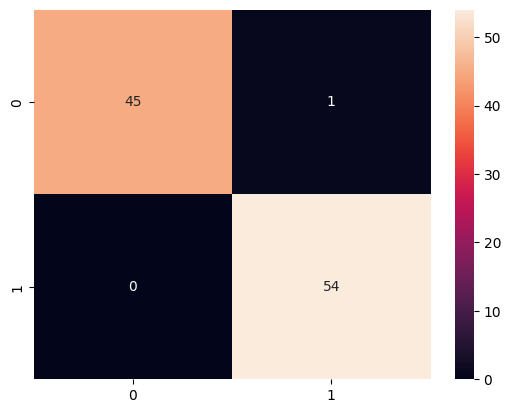

In [ ]:
sns.heatmap(matrix,annot=True)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
report=classification_report(y_test, model.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        46
           1       0.98      1.00      0.99        54

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

